In [2]:
# data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# MLP
from sklearn.neural_network import MLPClassifier
# Treino/Teste Split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Read Data

In [3]:
X = pd.read_csv("./data_pre/X_zscore.data", index_col=0)
y = pd.read_csv("./data_pre/y.data", index_col=0, header=None)

In [4]:
X.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,-1.057672,0.291870,-1.053250,-0.164700,-1.143985,0.544117,2.365038,-1.714317,0.344986,-0.917048,1.347741,0.034124,-1.305915,-0.219076,-1.438117,0.122908
1,0.510372,1.502320,-1.053250,0.719712,-0.687459,1.531266,-1.075299,0.137557,-0.495060,1.895920,-1.312774,0.514751,-0.448481,-0.219076,0.120078,1.359407
2,-0.012309,1.199708,0.435899,1.161918,1.138643,1.531266,-0.645257,-0.973567,0.344986,0.690363,-1.312774,-0.446502,-0.019764,-0.865605,-0.269470,0.741157
3,1.555735,1.199708,0.435899,0.277506,-0.230933,-0.936608,0.644870,-0.232818,0.344986,-1.720753,-0.932700,0.995377,1.266387,1.073981,-0.659019,0.122908
4,-1.057672,-1.826418,-1.053250,-1.933523,-1.143985,0.544117,-0.645257,0.507932,0.344986,-0.917048,-0.552627,0.514751,-0.877198,-0.865605,0.509627,1.359407


### Selecionando conjunto de treino/teste

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [6]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### Testando diversos modelos de MLP

In [6]:
hidden_layers = [(2,), (2, 2), (4,), (4, 2), (8,), (8,4), (16), (32), (32, 16)]

In [7]:
means = {}
stds = {}
for hl in hidden_layers:
    print(hl)
    clf = MLPClassifier(activation='relu', solver='adam', early_stopping=True, 
                        max_iter=1000, batch_size=16, validation_fraction=0.2,
                        hidden_layer_sizes=hl)
    
    all_accuracies = cross_val_score(estimator=clf, X=X, y=y, cv=kfold)
    means[str(hl)] = all_accuracies.mean()
    stds[str(hl)] = all_accuracies.std()

(2,)


/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWar

(2, 2)


/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWar

(4,)


/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWar

(4, 2)


/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWar

(8,)


/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWar

(8, 4)


/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWar

16


/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWar

32


/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWar

(32, 16)


/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWar

In [10]:
means

{'(2,)': 0.33103838686867837,
 '(2, 2)': 0.2588176341173702,
 '(4,)': 0.5732122912672581,
 '(4, 2)': 0.3968787889865698,
 '(8,)': 0.7455122766758002,
 '(8, 4)': 0.6731138344785724,
 '16': 0.8438957684076065,
 '32': 0.9012011626603768,
 '(32, 16)': 0.9435623278683831}

In [13]:
means2 = {}
stds2 = {}
for activation in ['identity', 'logistic', 'tanh', 'relu']:
    print(activation)
    clf = MLPClassifier(activation=activation, solver='adam', early_stopping=True, 
                        max_iter=1000, batch_size=16, validation_fraction=0.2,
                        hidden_layer_sizes=(32, 16))
    
    all_accuracies = cross_val_score(estimator=clf, X=X, y=y, cv=kfold)
    means2[str(activation)] = all_accuracies.mean()
    stds2[str(activation)] = all_accuracies.std()

identity


/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWar

logistic


/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWar

tanh


/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWar

relu


/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWar

In [14]:
means2

{'identity': 0.767848410166562,
 'logistic': 0.8795632503742222,
 'tanh': 0.8901981005539585,
 'relu': 0.9025104563071544}

In [17]:
means3 = {}
stds3 = {}
for hl in [(50), (50, 50), (100), (100, 50)]:
    print(activation)
    clf = MLPClassifier(activation='relu', solver='adam', early_stopping=True, 
                        max_iter=1000, batch_size=16, validation_fraction=0.2,
                        hidden_layer_sizes=hl)
    
    all_accuracies = cross_val_score(estimator=clf, X=X, y=y, cv=kfold)
    means3[str(hl)] = all_accuracies.mean()
    stds3[str(hl)] = all_accuracies.std()

relu


/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWar

relu


/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWar

relu


/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWar

relu


/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWar

In [18]:
means3

{'50': 0.923151345144238,
 '(50, 50)': 0.9424550103151521,
 '100': 0.9446994877251607,
 '(100, 50)': 0.9503979663780621}

### plotando as diferenças na configurações

In [47]:
def plot_bar(index, label, title):
    plt.bar(index, label)
    plt.xlabel('Acuracia', fontsize=25)
    plt.ylabel('Parametros', fontsize=25)
    plt.xticks(index, label, fontsize=10, rotation=30)
    plt.yticks(index, fontsize=10)
    plt.title(title)
    plt.show()

In [48]:
plt.xticks

<function matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)>

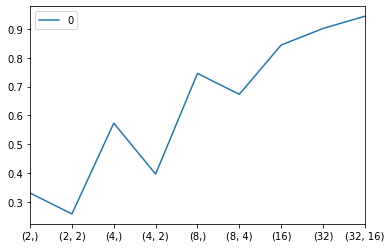

In [65]:
# Variação 
label = ['(2,)', '(2, 2)', '(4,)', '(4, 2)', '(8,)', '(8, 4)', '(16)'  , '(32)'  , '(32, 16)']
results = np.array([0.3310, 0.2588, 0.5732, 0.3968, 0.7455, 0.6731, 0.8438, 0.9012, 0.9435])

df = pd.DataFrame(results, index=label)
df.plot()

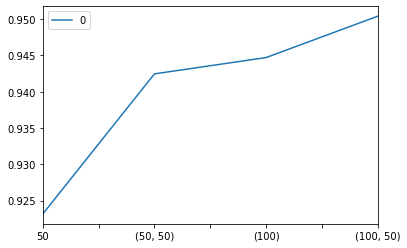

In [67]:
labels = [('50'), '(50, 50)', '(100)', '(100, 50)']
results = [0.923151345144238, 0.9424550103151521, 0.9446994877251607, 0.9503979663780621]

df = pd.DataFrame(results, index=labels)
df.plot()

### Classification Report

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [14]:
clf_mlp = MLPClassifier(activation='relu', solver='adam', early_stopping=True, 
                            max_iter=1000, batch_size=16, validation_fraction=0.2,
                            hidden_layer_sizes=(100, 50))

clf_mlp.fit(X_train, y_train)

/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size=16, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(100, 50), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.2, verbose=False, warm_start=False)

In [17]:
y_pred = clf_mlp.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.99      0.97      0.98       264
           B       0.92      0.91      0.92       253
           C       0.98      0.90      0.94       213
           D       0.95      0.94      0.95       282
           E       0.95      0.94      0.94       257
           F       0.91      0.96      0.93       232
           G       0.95      0.94      0.94       245
           H       0.87      0.90      0.89       238
           I       0.97      0.94      0.96       239
           J       0.96      0.96      0.96       245
           K       0.93      0.92      0.93       203
           L       0.94      0.97      0.95       248
           M       0.95      0.99      0.97       274
           N       0.90      0.96      0.93       254
           O       0.93      0.96      0.95       248
           P       1.00      0.94      0.96       277
           Q       0.95      0.95      0.95       279
           R       0.90    